# Visualization of training samples

# table of content


### Dependencies and general utils

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import open3d as o3d
import laspy
import pdal
import json
from tqdm import tqdm

### Visualization of tiles from above

In [7]:
# loading
tile_src = "../data/training_sample_visualization/color_grp_full_tile_311_out_gt.laz"
tile = laspy.read(tile_src)
print(list(tile.point_format.dimension_names))

['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns', 'synthetic', 'key_point', 'withheld', 'overlap', 'scanner_channel', 'scan_direction_flag', 'edge_of_flight_line', 'classification', 'user_data', 'scan_angle', 'point_source_id', 'gps_time', 'red', 'green', 'blue', 'PredSemantic', 'PredInstance', 'gt_semantic_segmentation', 'gt_instance_segmentation']


#### utils

In [ ]:
def plot_las_top_down(las_path, point_size=0.5, color_by='z'):
    """
    Load a LAS/LAZ file and generate a top-down image (XY plane) colored by height or intensity.

    Parameters:
    - las_path: str, path to the .las or .laz file
    - point_size: float, size of each point in the scatter plot
    - color_by: str, either 'z' or 'intensity', to color points
    """
    # Load LAS file
    las = laspy.read(las_path)

    # Get coordinates
    x = las.x
    y = las.y

    # Get values for coloring
    try:
        c = las.__getattr__(color_by)
    except Exception as e:
        print("Not working!\n", e)
    # if color_by == 'z':
    #     c = las.z
    # elif color_by == 'intensity' and 'intensity' in las.point_format.dimension_names:
    #     c = las.intensity
    # else:
    #     raise ValueError("color_by must be 'z' or 'intensity' and available in the file")

    # Plot
    plt.figure(figsize=(10, 10))
    plt.scatter(x, y, c=c, s=point_size, cmap='viridis', marker='.')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Top-Down View (colored by {color_by})")
    plt.colorbar(label=color_by)
    plt.axis("equal")
    plt.tight_layout()
    plt.show()

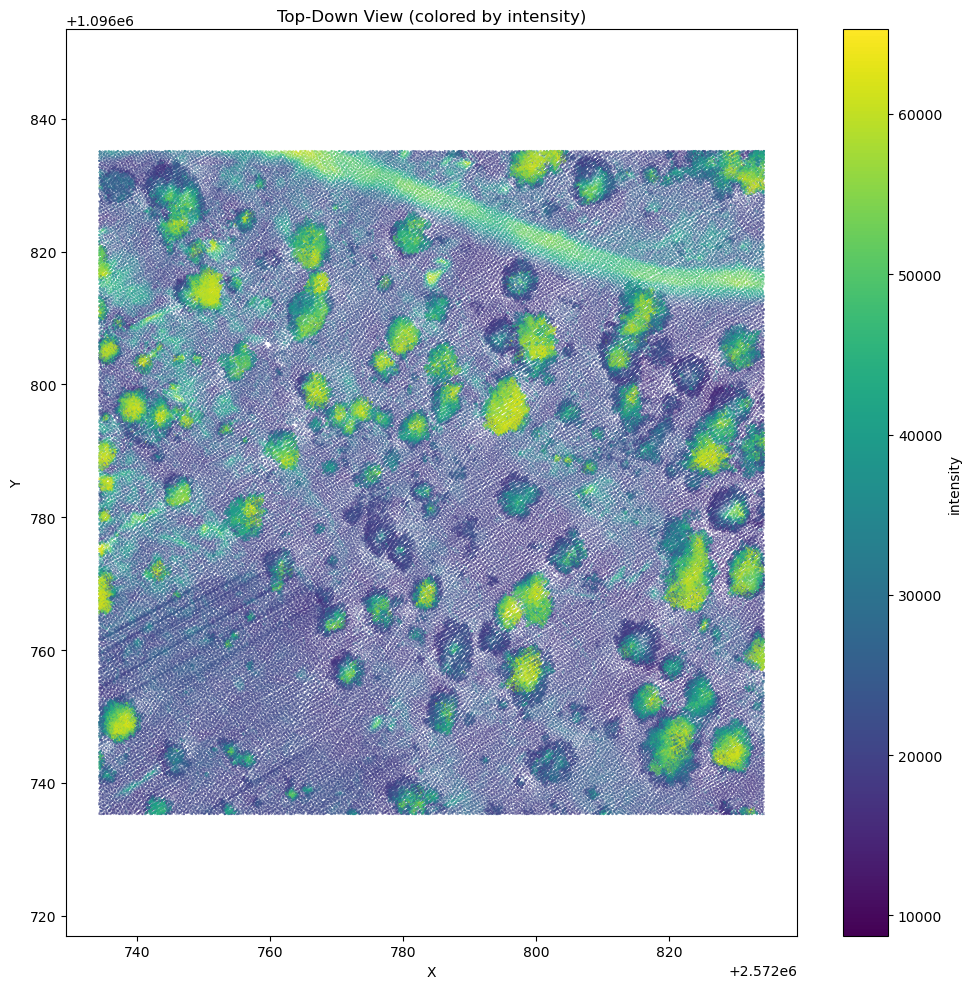

In [6]:
plot_las_top_down(tile_src, point_size=0.2, color_by='intensity')